In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model
from models.lstm_v1.lstm_normalize import get_lstm_data
from utils.chart import config_chart
import tensorflow as tf
from constants import SP500_TICKER

---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 30129 (117.69 KB)
Trainable params: 30129 (117.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data(SP500_TICKER)

x_train = train['x']
y_train = train['y']
dates_train = train['dates']

x_test = test['x']
y_test = test['y']
dates_test = test['dates']

x_predict = predict['x']
y_predict = predict['y']
dates_predict = predict['dates']

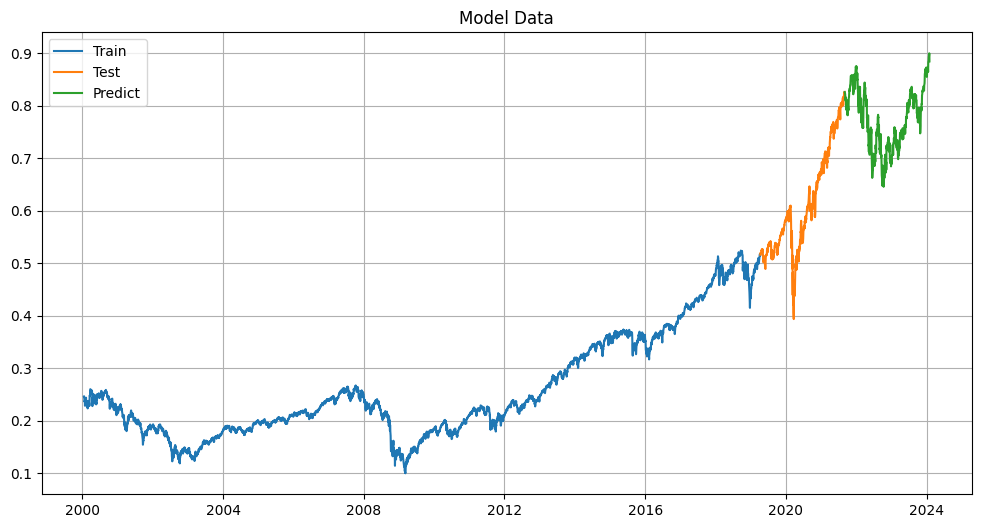

In [5]:
plt = config_chart('Model Data')
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.plot(dates_predict, y_predict)
plt.legend(['Train', 'Test', 'Predict'])

In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/100


152/152 - 4s - loss: 0.0043 - mean_absolute_error: 0.0317 - 4s/epoch - 24ms/step
Epoch 2/100
152/152 - 1s - loss: 5.0563e-05 - mean_absolute_error: 0.0052 - 690ms/epoch - 5ms/step
Epoch 3/100
152/152 - 1s - loss: 4.3717e-05 - mean_absolute_error: 0.0048 - 686ms/epoch - 5ms/step
Epoch 4/100
152/152 - 1s - loss: 4.1573e-05 - mean_absolute_error: 0.0048 - 694ms/epoch - 5ms/step
Epoch 5/100
152/152 - 1s - loss: 3.8870e-05 - mean_absolute_error: 0.0046 - 681ms/epoch - 4ms/step
Epoch 6/100
152/152 - 1s - loss: 3.9123e-05 - mean_absolute_error: 0.0046 - 682ms/epoch - 4ms/step
Epoch 7/100
152/152 - 1s - loss: 4.1628e-05 - mean_absolute_error: 0.0048 - 692ms/epoch - 5ms/step
Epoch 8/100
152/152 - 1s - loss: 4.0046e-05 - mean_absolute_error: 0.0047 - 714ms/epoch - 5ms/step
Epoch 9/100
152/152 - 1s - loss: 4.1739e-05 - mean_absolute_error: 0.0048 - 718ms/epoch - 5ms/step
Epoch 10/100
152/152 - 1s - loss: 4.0090e-05 - mean_absolute_error: 0.0047 - 686ms/epoch - 5ms/step
Epoch 11/100


Text(0, 0.5, 'Value')

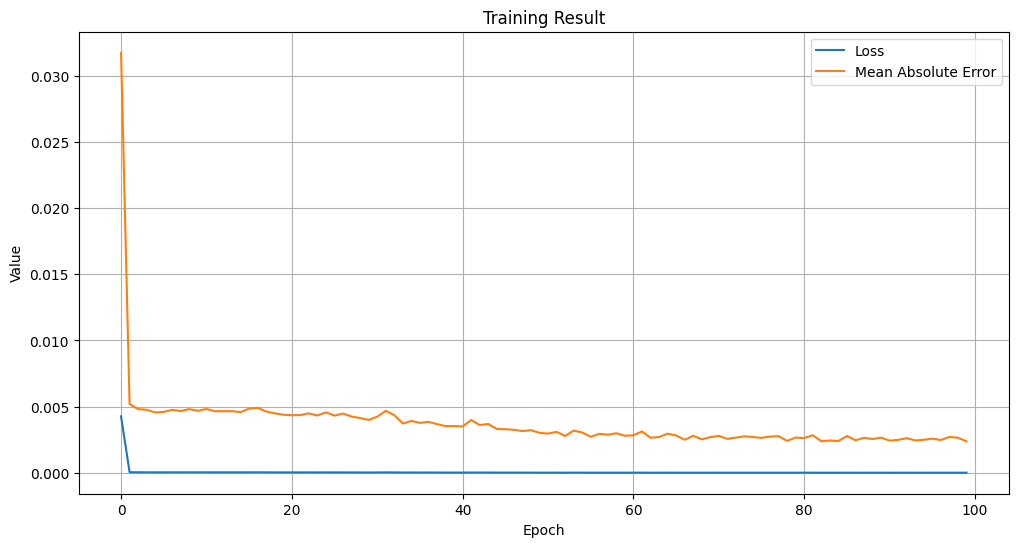

In [7]:
plt = config_chart('Training Result')
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Value')

In [8]:
model.save('./models/lstm_v1/lstm_model_v1')
model = tf.keras.models.load_model('./models/lstm_v1/lstm_model_v1')

INFO:tensorflow:Assets written to: ./models/lstm_v1/lstm_model_v1\assets


INFO:tensorflow:Assets written to: ./models/lstm_v1/lstm_model_v1\assets


In [9]:
predictions = model.predict(x_predict)

19/19 [==============================] - 1s 2ms/step


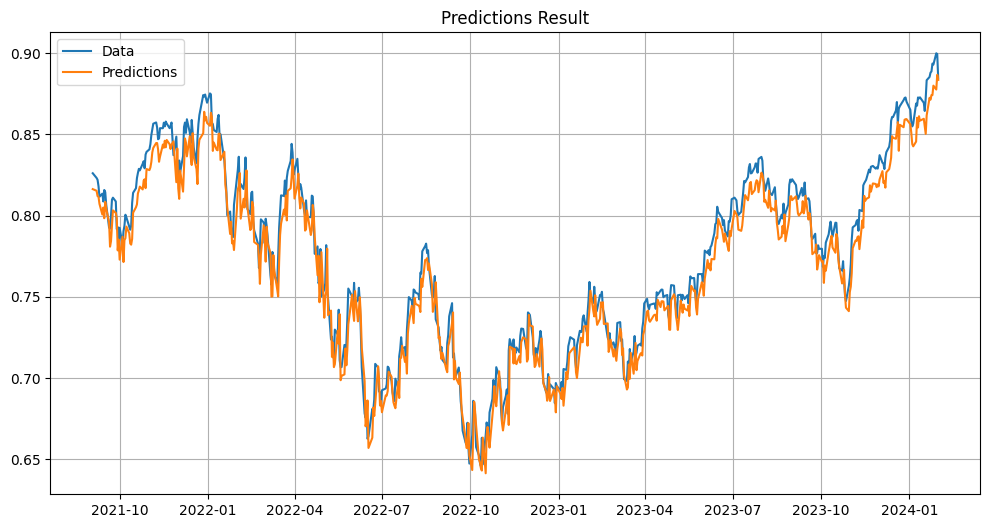

In [10]:
plt = config_chart('Predictions Result')
plt.plot(dates_predict, y_predict)
plt.plot(dates_predict, predictions)
plt.legend(['Data', 'Predictions'])

In [11]:
predictions = model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


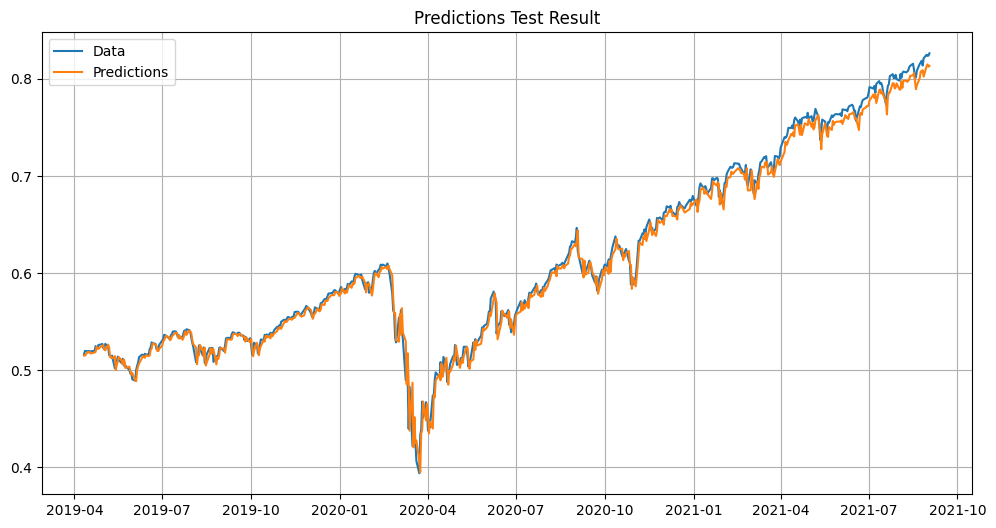

In [12]:
plt = config_chart('Predictions Test Result')
plt.plot(dates_test, y_test)
plt.plot(dates_test, predictions)
plt.legend(['Data', 'Predictions'])